In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import tqdm

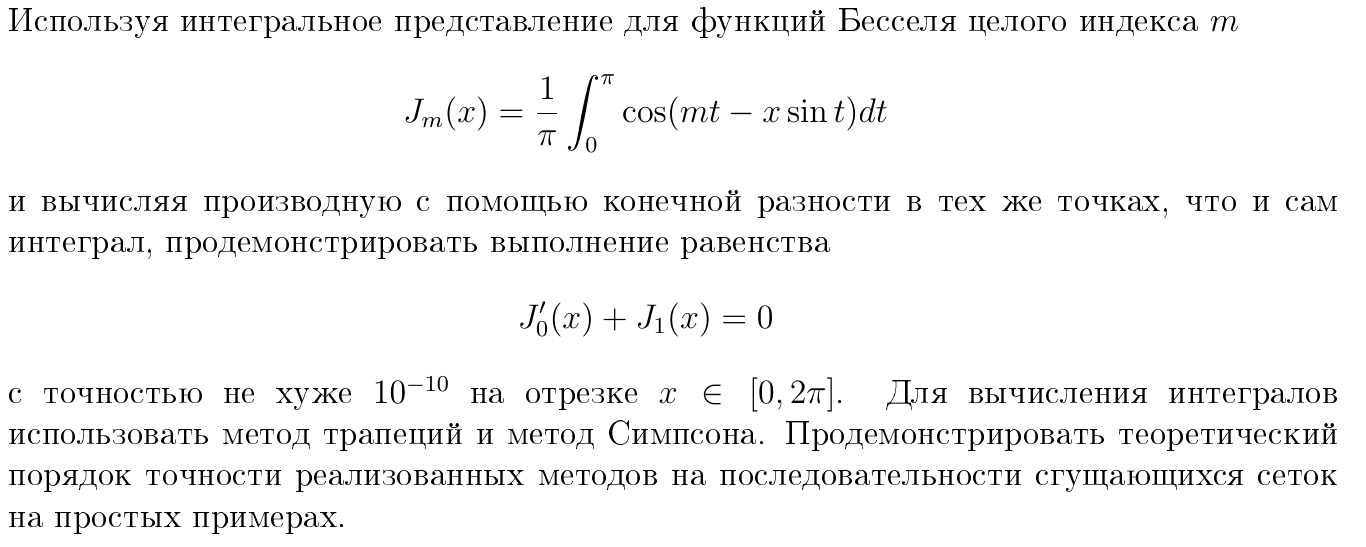

In [2]:
Image('task 4.png')

In [3]:
calc_points = 100
X = np.linspace(0, 2*np.pi, calc_points)[:, np.newaxis]

h = 1e-5

f = lambda x, t, m: (1 / np.pi) * np.cos(m * t - x * np.sin(t))

In [4]:
integration_intervals = 100

def Simpson(x, m):
    step_size = np.pi/integration_intervals

    dots = np.linspace(0, np.pi, integration_intervals + 1)
    values = np.vectorize(f)(x, dots, m)
    return np.sum(values[::,0:-1:2] + values[::,2::2] + 4 * values[::,1::2], axis=1) * step_size / 3

def Trapeze(x, m):
    step_size = np.pi/integration_intervals

    dots = np.linspace(0, np.pi, integration_intervals+1)
    values = np.vectorize(f)(x, dots, m)
    return np.sum(values[::,1::] + values[::, :-1:], axis=1) * step_size / 2

In [5]:
def twoPointDerivative(func, x0, params, delta):
    return (func(x0+delta, params) - func(x0-delta, params)) / (2*delta)

def fourPointDerivative(func, x0, params, delta):
    return (func(x0-2*delta, params) - 8*func(x0-delta, params)
            + 8*func(x0+delta, params) - func(x0+2*delta, params)) / (12*delta)

In [6]:
j0_S = Simpson(X, 0)
j0_T = Trapeze(X, 0)

dj0_S = fourPointDerivative(Simpson, X, 0, h)
dj0_T = fourPointDerivative(Trapeze, X, 0, h)

j1_S = Simpson(X, 1)
j1_T = Trapeze(X, 1)

err_S = j1_S + dj0_S
err_T = j1_T + dj0_T

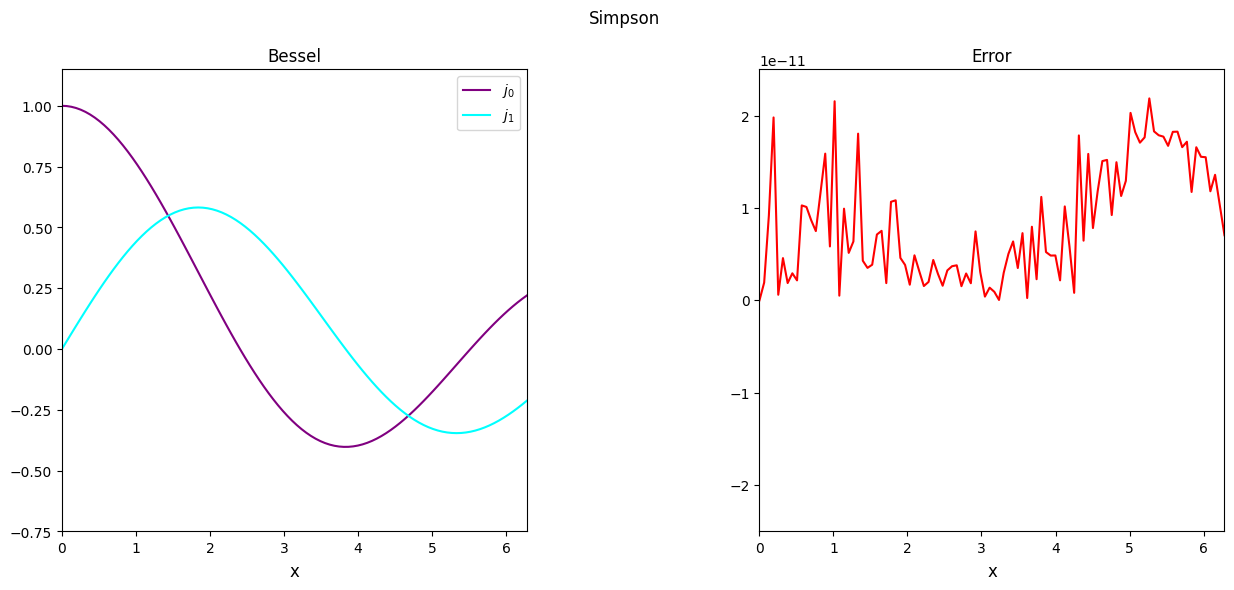

In [7]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle("Simpson")

plt_j = fig.add_subplot(121)
plt_err = fig.add_subplot(122)
plt_j.axis([X[0], X[-1], -0.75, 1.15])
plt_j.plot(X, j0_S, color='purple', label=r'$j_0$')
plt_j.plot(X, j1_S, color='cyan', label=r'$j_1$')
plt_j.set_xlabel('x', labelpad=5, fontsize=12)
plt_j.set_title('Bessel')
plt_j.legend()

plt_err.axis([X[0], X[-1], -2.5e-11, 2.5e-11])
plt_err.plot(X, abs(err_S), color='r', label='err')
plt_err.set_xlabel('x', labelpad=5, fontsize=12)
plt_err.set_title('Error')
# plt_err.legend()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

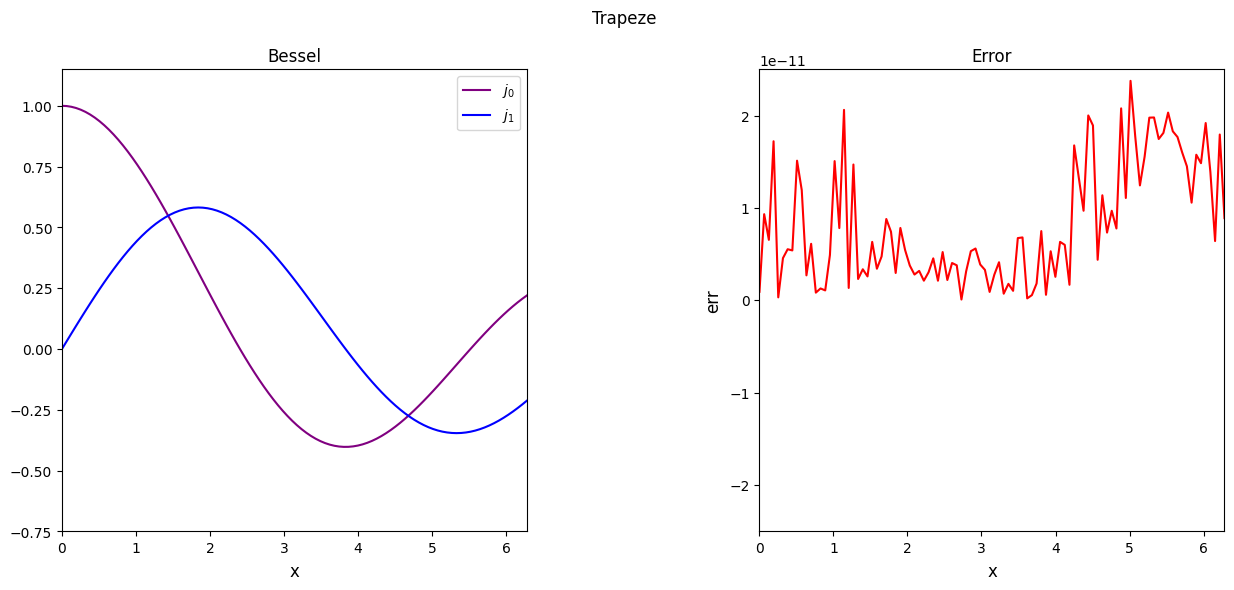

In [8]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle("Trapeze")

plt_j = fig.add_subplot(121)
plt_err = fig.add_subplot(122)
plt_j.axis([X[0], X[-1], -0.75, 1.15])
plt_j.plot(X, j0_T, color='purple', label=r'$j_0$')
plt_j.plot(X, j1_T, color='blue', label=r'$j_1$')
plt_j.set_xlabel('x', labelpad=5, fontsize=12)
plt_j.set_title('Bessel')
plt_j.legend()

plt_err.axis([X[0], X[-1], -2.5e-11, 2.5e-11])
plt_err.plot(X, abs(err_T), color='r', label='err')
plt_err.set_xlabel('x', labelpad=5, fontsize=12)
plt_err.set_ylabel('err', labelpad=5, fontsize=12)
plt_err.set_title('Error')
# plt_err.legend()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [9]:
err_S = []
points = [pow(10, i) for i in range(1, 7)]

for calc_points in tqdm.tqdm(points):
    X = np.linspace(0, 2 * np.pi, calc_points)[:, np.newaxis]

    j0_S = Simpson(X, 0)
    # dj0_S = (Simpson(X + h, 0) - Simpson(X - h, 0)) / (2 * h)
    dj0_S = twoPointDerivative(Simpson, X, 0, h)

    j1_S = Simpson(X, 1)

    err_S += [np.sum(j1_S + dj0_S) / len(j1_S)]


100%|██████████| 6/6 [09:58<00:00, 99.81s/it] 


Text(0, 0.5, 'Err')

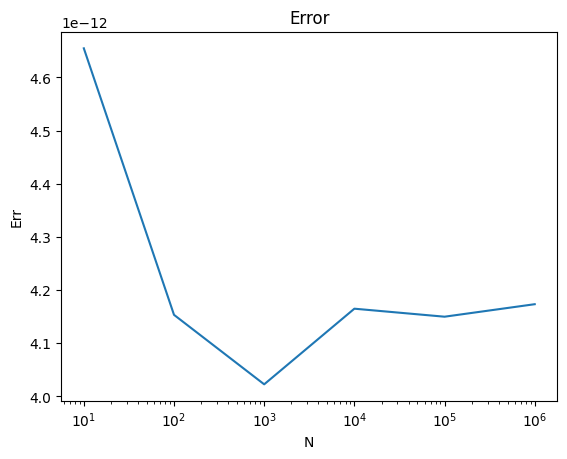

In [10]:
plt.plot(points, np.vectorize(abs)(err_S))
plt.xscale('log', base=10)
plt.title('Error')
plt.xlabel('N')
plt.ylabel('Err')

In [11]:
err_S = []
points = [pow(10, i) for i in range(1, 7)]

for calc_points in tqdm.tqdm(points):
    X = np.linspace(0, 2 * np.pi, calc_points)[:, np.newaxis]

    j0_S = Simpson(X, 0)
    dj0_S = fourPointDerivative(Simpson, X, 0, h)
    j1_S = Simpson(X, 1)

    err_S += [np.sum(j1_S + dj0_S) / len(j1_S)]

100%|██████████| 6/6 [14:48<00:00, 148.00s/it]


Text(0, 0.5, 'Err')

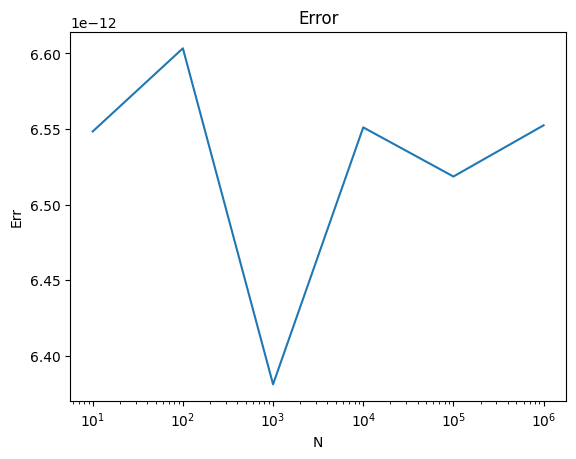

In [12]:
plt.plot(points, np.vectorize(abs)(err_S))
plt.xscale('log', base=10)
plt.title('Error')
plt.xlabel('N')
plt.ylabel('Err')